In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# make a datagram with 2 columns:
# 1. primary capsule: (1), (2), (3), (4)
# 2. routing method: dynamic, fuzzy, ,max-min, em
# 3. Accuracy: float

# create a dataframe with all opossible combinations and random accuracy
acc = [[83.7, 82.18, 84.29, 80.1],
       [79.14, 79.57, 83.47, 83.06],
       [84.02, 80.37, 82.82, 83.84],
       [84.26, 81.76, 83.72, 80.89]
       ]

df = pd.DataFrame(columns=['primary capsule', 'routing method', 'accuracy'])
for i in range(1, 5):
    for j in ['dynamic', 'fuzzy', 'max-min', 'em']:
        new_row = {'primary capsule': f"method ({i})", 'routing method': j, 'accuracy': acc[i-1][['dynamic', 'fuzzy', 'max-min', 'em'].index(j)]}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
df

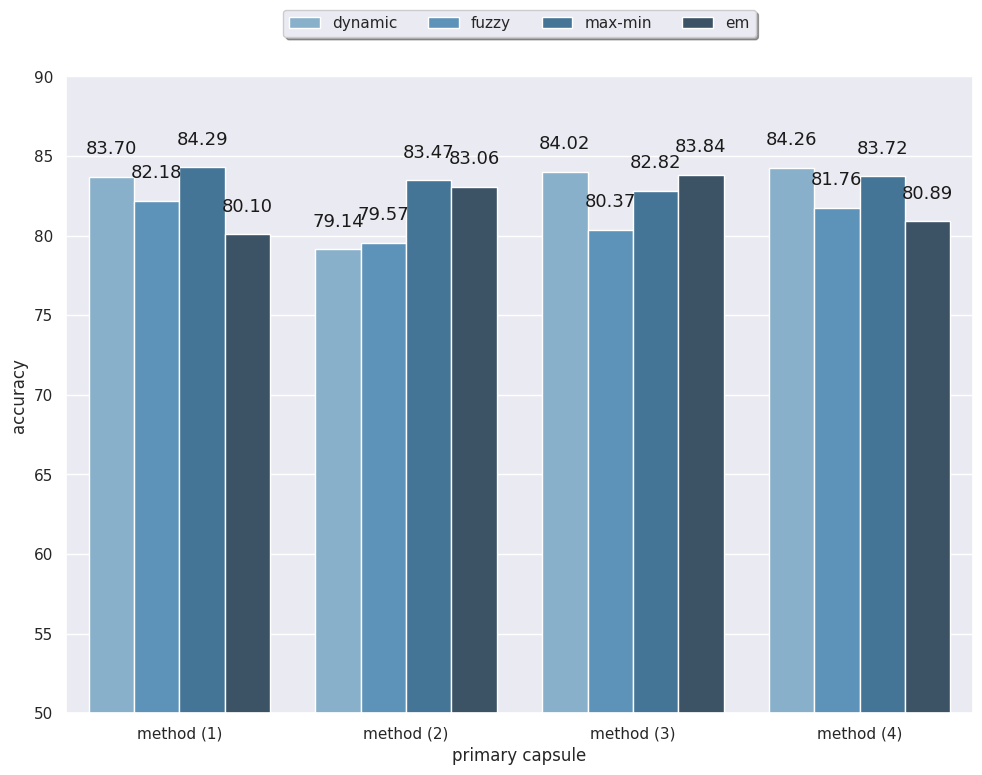

In [8]:
# draw a bar plot with seaborn for df where accuracy axis starts from 50 to 90
sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set_theme(style="whitegrid")
ax = sns.barplot(x="primary capsule", y="accuracy", hue="routing method", data=df, palette="Blues_d")
ax.set(ylim=(50, 90))
# add labels to each bar
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=13, color='k', xytext=(0, 20),
        textcoords='offset points')
# legend position inside the plot frame
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided table
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}  # Not provided in the table
    }
}

# Extracting data for plotting
datasets = ['CIFAR 10', 'CIFAR 100']
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']

# Creating the bar chart
fig, axes = plt.subplots(len(datasets), len(backbones), figsize=(10, 6))

for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        ax = axes[i][j]
        if data[dataset][backbone]['With Pretrained'] is not None:
            ax.bar(approaches, [data[dataset][backbone]['With Pretrained'], data[dataset][backbone]['Scratch']])
        else:
            ax.bar([approaches[1]], [data[dataset][backbone]['Scratch']])
        ax.set_title(f'{dataset}\n{backbone}')
        ax.set_ylabel('Accuracy')
        ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
# Extracting data for plotting
datasets = ['CIFAR 10', 'CIFAR 100']
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
x = np.arange(len(datasets))

for i, backbone in enumerate(backbones):
    with_pretrained = [data[dataset][backbone]['With Pretrained'] for dataset in datasets]
    scratch = [data[dataset][backbone]['Scratch'] for dataset in datasets]
    
    ax.bar(x - bar_width/2, with_pretrained, width=bar_width, label=f'{backbone} - With Pretrained')
    ax.bar(x + bar_width/2, scratch, width=bar_width, label=f'{backbone} - Scratch')

ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets and Backbones')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']

for dataset in datasets:
    fig, axes = plt.subplots(1, len(backbones), figsize=(10, 6), subplot_kw={'polar': True})
    plt.suptitle(f'{dataset} - Comparison of Accuracy', y=1.05, fontsize=16)
    for i, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        angles = np.linspace(0, 2 * np.pi, len(approaches), endpoint=False)
        values = np.concatenate((values, [values[0]]))  # Close the loop
        angles = np.concatenate((angles, [angles[0]]))  # Close the loop

        ax = axes[i]
        ax.plot(angles, values, 'o-', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles)
        ax.set_xticklabels(approaches)
        ax.set_yticklabels([])
        ax.set_title(backbone)

    plt.tight_layout()
    plt.show()

In [ ]:
x = np.arange(len(backbones))  # the label locations
width = 0.35  # the width of the bars

# Creating grouped bar charts
for dataset in datasets:
    fig, ax = plt.subplots()
    rects_with_pretrained = []
    rects_scratch = []

    for i, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        rects_with_pretrained.append(ax.bar(x[i] - width/2, values[0], width, label=approaches[0]))
        rects_scratch.append(ax.bar(x[i] + width/2, values[1], width, label=approaches[1]))

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Comparison of Accuracy for {dataset}')
    ax.set_xticks(x)
    ax.set_xticklabels(backbones)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    for rects in [rects_with_pretrained, rects_scratch]:
        autolabel(rects)

    fig.tight_layout()

    plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

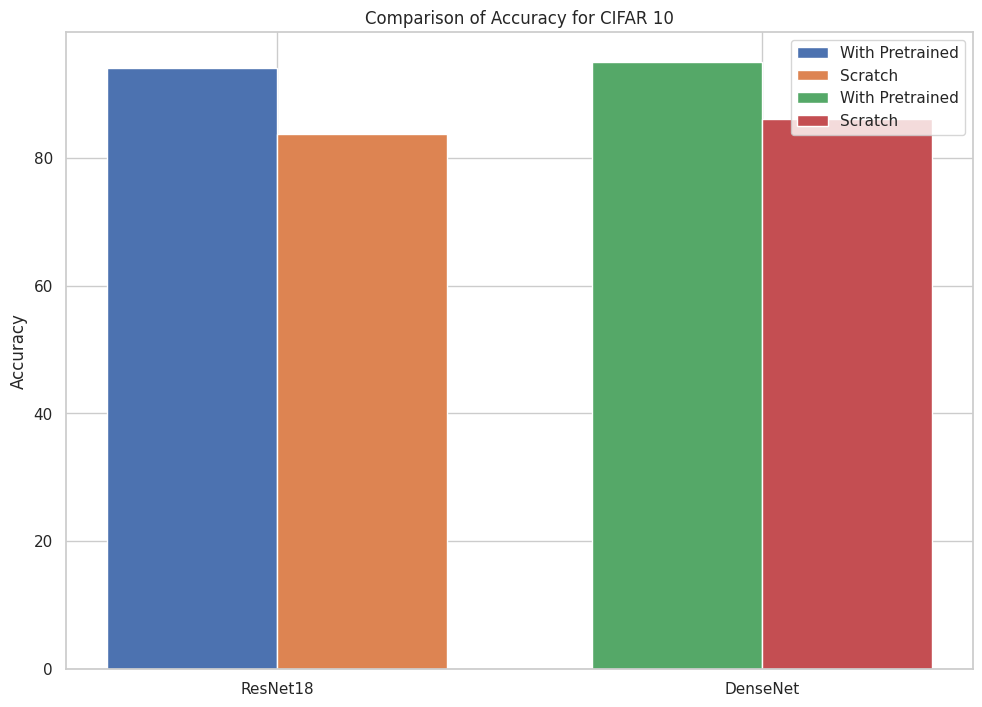

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided table
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': None, 'Scratch': None}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(backbones))  # the label locations
width = 0.35  # the width of the bars

# Creating grouped bar charts
for dataset in datasets:
    fig, ax = plt.subplots()
    rects_with_pretrained = []
    rects_scratch = []

    for i, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        rects_with_pretrained.append(ax.bar(x[i] - width/2, values[0], width, label=approaches[0]))
        rects_scratch.append(ax.bar(x[i] + width/2, values[1], width, label=approaches[1]))

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Comparison of Accuracy for {dataset}')
    ax.set_xticks(x)
    ax.set_xticklabels(backbones)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    for rects in [rects_with_pretrained, rects_scratch]:
        autolabel(rects)

    fig.tight_layout()

    plt.show()

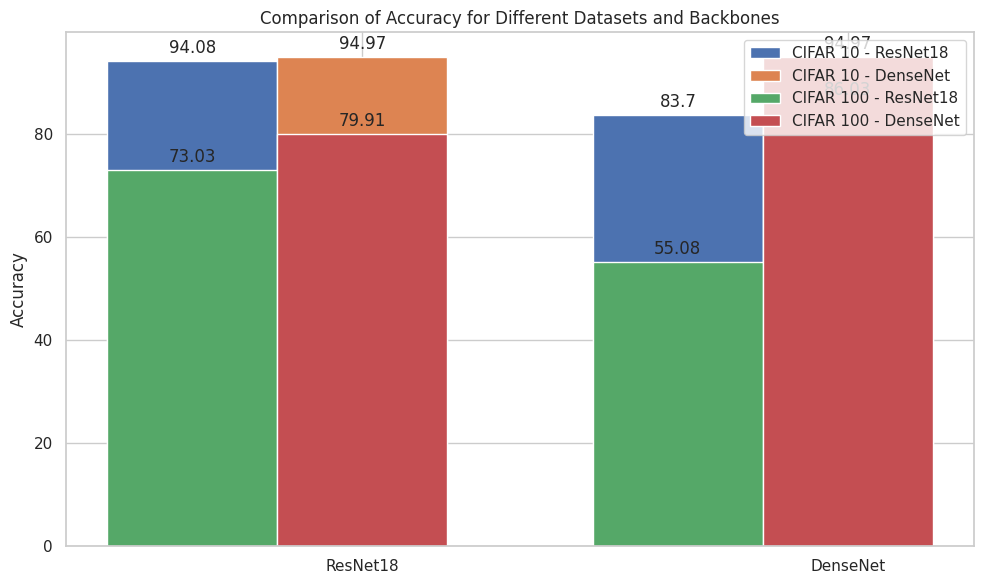

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided table
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}  # Not provided in the table
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(backbones))  # the label locations
width = 0.35  # the width of the bars

# Creating grouped bar charts
fig, ax = plt.subplots(figsize=(10, 6))
rects = []

for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        if values[1] is not None:  # Avoid plotting None values
            rects.append(ax.bar(x + j * width, values, width, label=f'{dataset} - {backbone}'))

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets and Backbones')
ax.set_xticks(x + width)
ax.set_xticklabels(backbones)
ax.legend()

# Add labels above the bars
for rect in rects:
    for r in rect:
        height = r.get_height()
        ax.annotate('{}'.format(height),
                    xy=(r.get_x() + r.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.tight_layout()

plt.show()

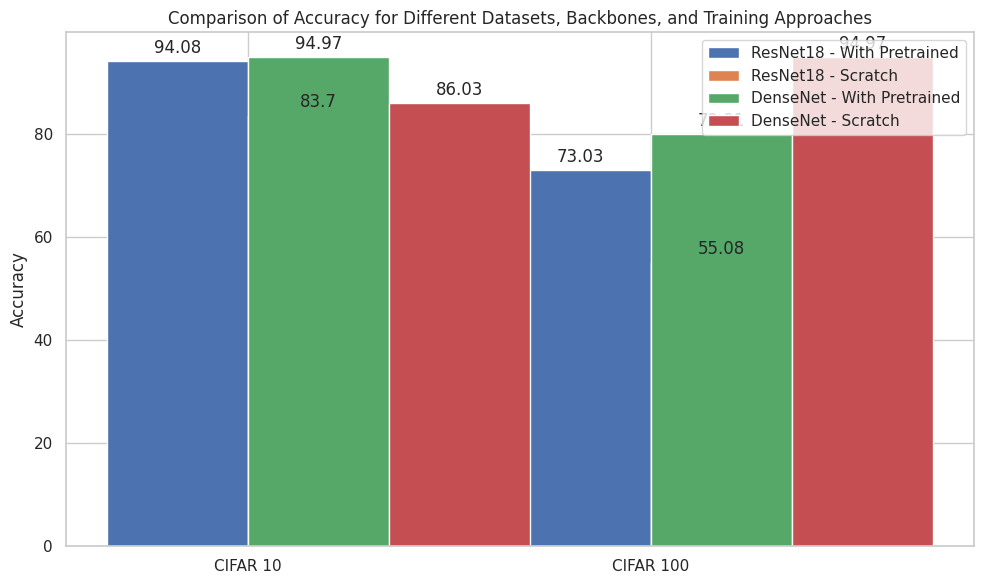

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(datasets))  # the label locations
width = 0.35  # the width of the bars

# Creating grouped bar charts
fig, ax = plt.subplots(figsize=(10, 6))
rects_with_pretrained = []
rects_scratch = []

for i, backbone in enumerate(backbones):
    values_with_pretrained = [data[dataset][backbone]['With Pretrained'] for dataset in datasets]
    values_scratch = [data[dataset][backbone]['Scratch'] for dataset in datasets]
    rects_with_pretrained.append(ax.bar(x + i * width, values_with_pretrained, width, label=f'{backbone} - With Pretrained'))
    rects_scratch.append(ax.bar(x + i * width + width, values_scratch, width, label=f'{backbone} - Scratch'))

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets, Backbones, and Training Approaches')
ax.set_xticks(x + width/2)
ax.set_xticklabels(datasets)
ax.legend()

# Add some text for labels, title, and custom x-axis tick labels, etc.
def autolabel(rects):
    for rect in rects:
        for r in rect:
            height = r.get_height()
            ax.annotate('{}'.format(height),
                        xy=(r.get_x() + r.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

for rects in [rects_with_pretrained, rects_scratch]:
    autolabel(rects)

fig.tight_layout()

plt.show()

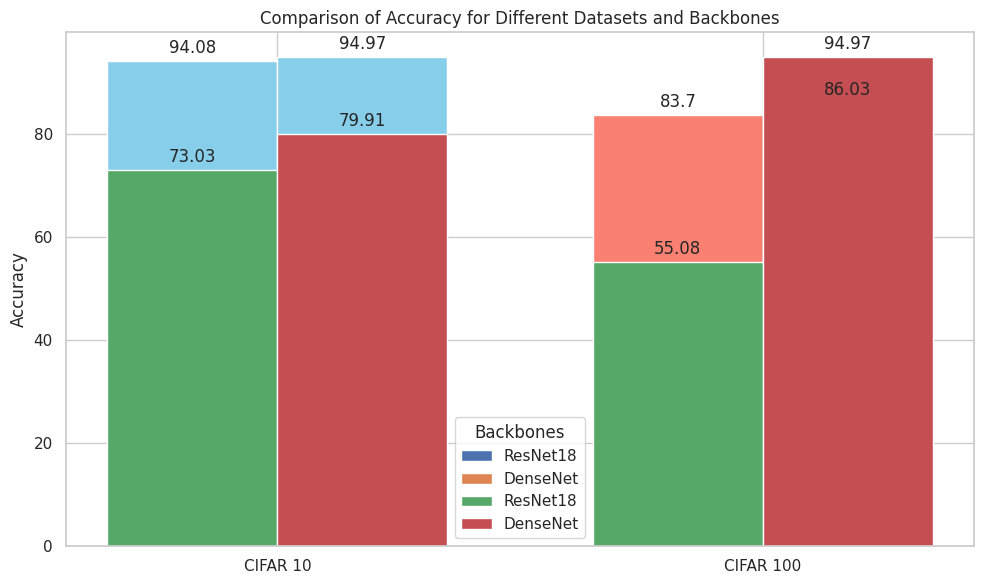

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(backbones))  # the label locations
width = 0.35  # the width of the bars

# Creating grouped bar charts
fig, ax = plt.subplots(figsize=(10, 6))

for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        rects = ax.bar(x + j * width, values, width, label=backbone)
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets and Backbones')
ax.set_xticks(x + width/2)
ax.set_xticklabels(datasets)
ax.legend(title='Backbones')

# Adding different colors for the two approaches
colors = ['skyblue', 'salmon']
for i, approach in enumerate(approaches):
    for j, backbone in enumerate(backbones):
        ax.patches[i + j * len(approaches)].set_facecolor(colors[i])

fig.tight_layout()

plt.show()

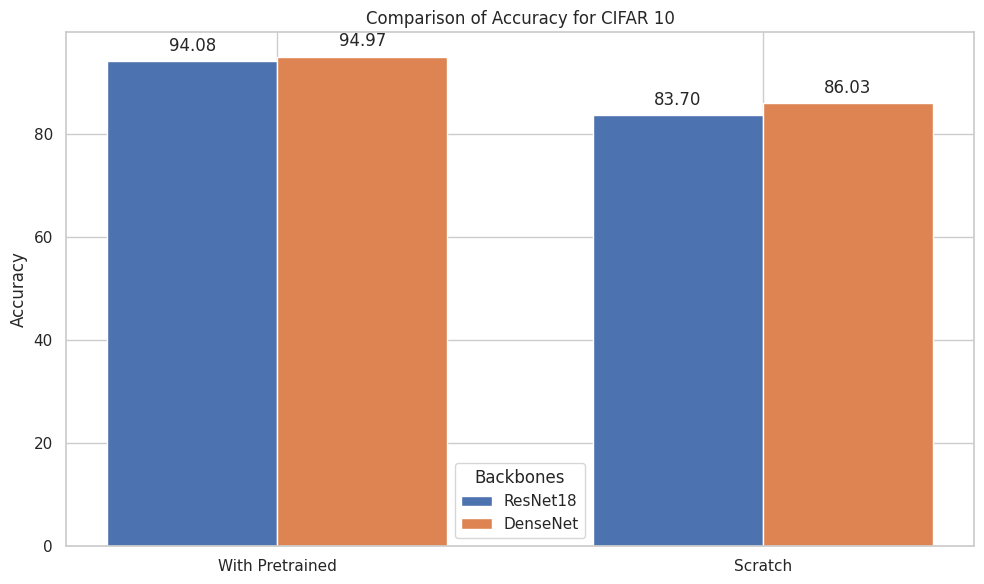

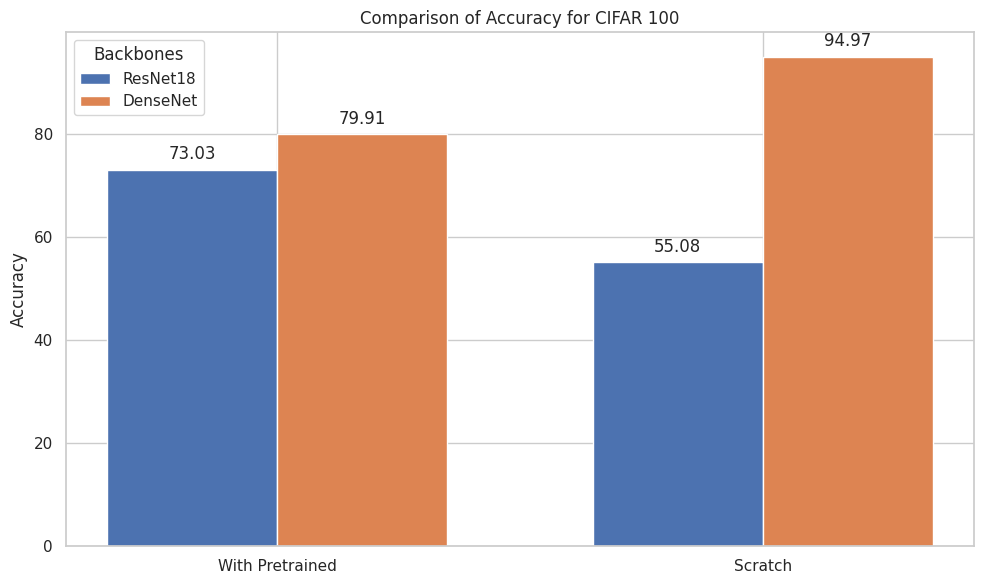

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(backbones))  # the label locations
width = 0.35  # the width of the bars

# Creating separate bar charts for each dataset
for dataset in datasets:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for j, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        ax.bar(x + j * width, values, width, label=backbone)
        for i, v in enumerate(values):
            ax.text(x[i] + j * width, v + 2, f'{v:.2f}', ha='center')

    ax.set_ylabel('Accuracy')
    ax.set_title(f'Comparison of Accuracy for {dataset}')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(approaches)
    ax.legend(title='Backbones')

    plt.tight_layout()

    plt.show()

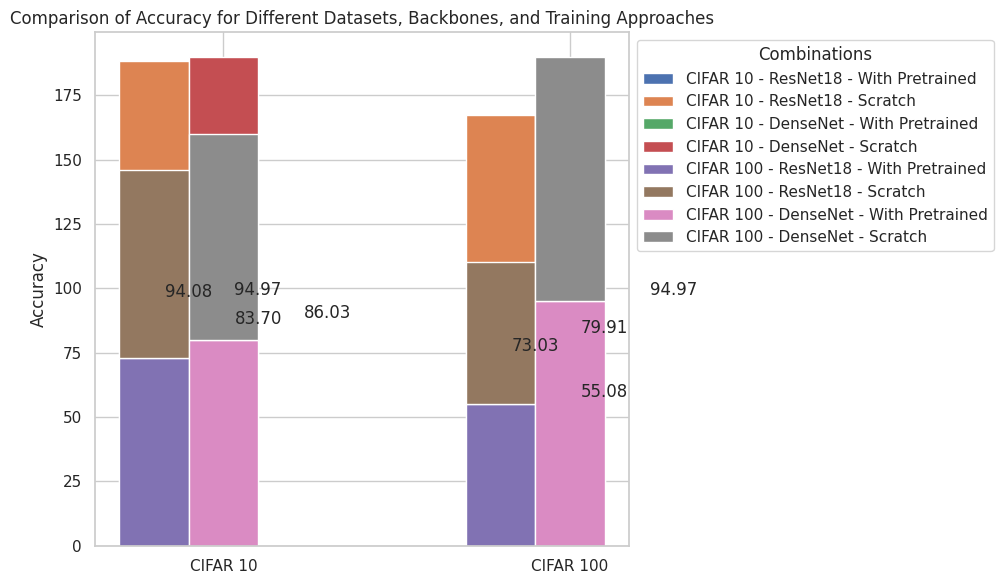

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(datasets))  # the label locations
width = 0.2  # the width of the bars

# Creating a single grouped bar chart for both datasets
fig, ax = plt.subplots(figsize=(10, 6))

for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        ax.bar(x + j * width, values, width, label=f'{dataset} - {backbone} - {approaches[0]}')
        ax.bar(x + j * width, values, width, bottom=values, label=f'{dataset} - {backbone} - {approaches[1]}')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets, Backbones, and Training Approaches')
ax.set_xticks(x + (width / 2) * len(backbones))
ax.set_xticklabels(datasets)
ax.legend(title='Combinations', bbox_to_anchor=(1, 1))

# Adding labels on top of bars
for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        for k, approach in enumerate(approaches):
            value = data[dataset][backbone][approach]
            ax.text(i + j * width + (width / 2) + width * k, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()


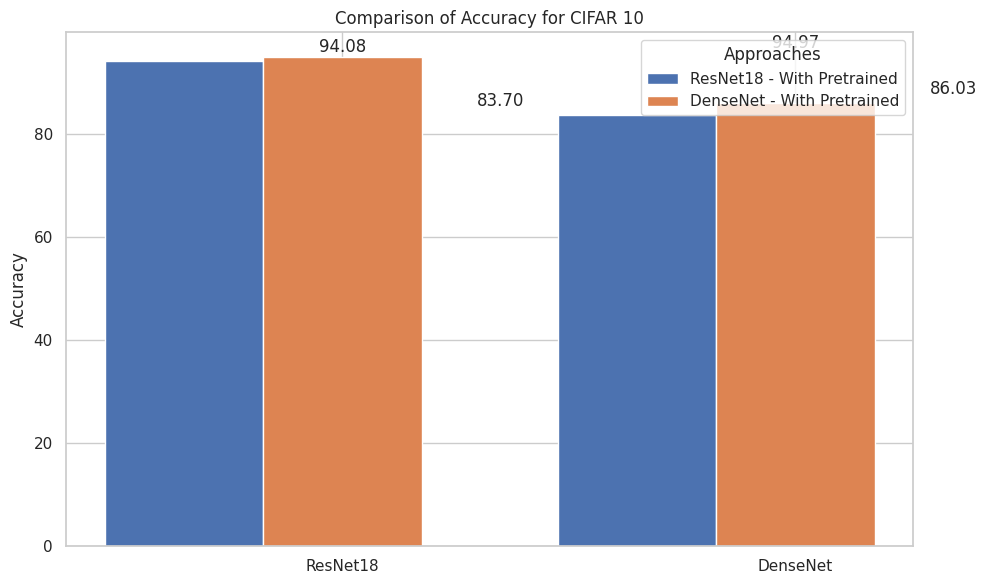

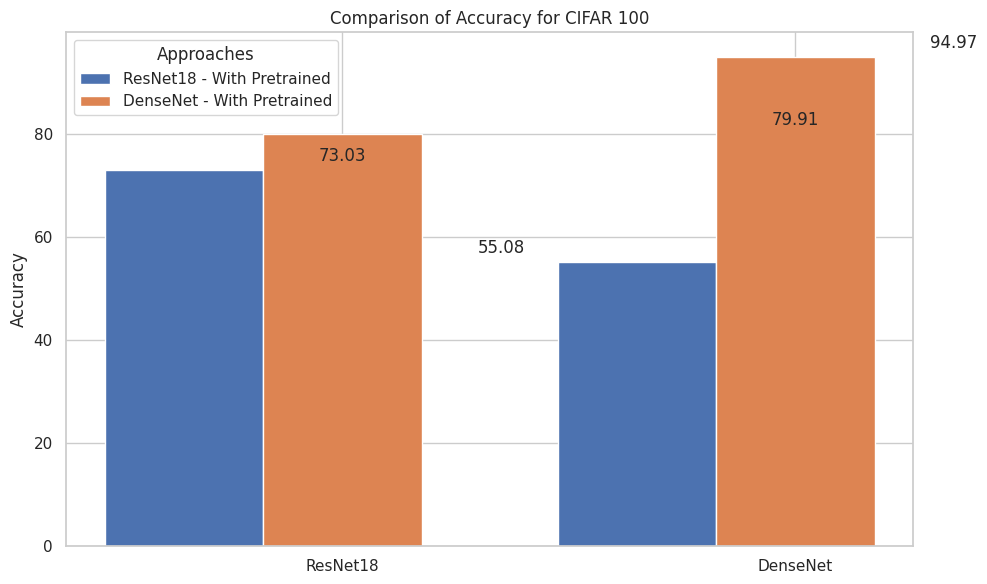

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(datasets))  # the label locations
bar_width = 0.35  # the width of the bars

# Creating separate bar charts for each dataset
for i, dataset in enumerate(datasets):
    fig, ax = plt.subplots(figsize=(10, 6))
    offset = -bar_width

    for j, backbone in enumerate(backbones):
        values = [data[dataset][backbone][approach] for approach in approaches]
        ax.bar(x + offset, values, bar_width, label=f'{backbone} - {approaches[0]}')
        offset += bar_width

    ax.set_ylabel('Accuracy')
    ax.set_title(f'Comparison of Accuracy for {dataset}')
    ax.set_xticks(x)
    ax.set_xticklabels(backbones)
    ax.legend(title='Approaches')

    # Adding labels on top of bars
    for j, backbone in enumerate(backbones):
        for k, approach in enumerate(approaches):
            value = data[dataset][backbone][approach]
            ax.text(x[j] + k * bar_width, value + 1, f'{value:.2f}', ha='center', va='bottom')

    plt.tight_layout()

    plt.show()


TypeError: unhashable type: 'dict'

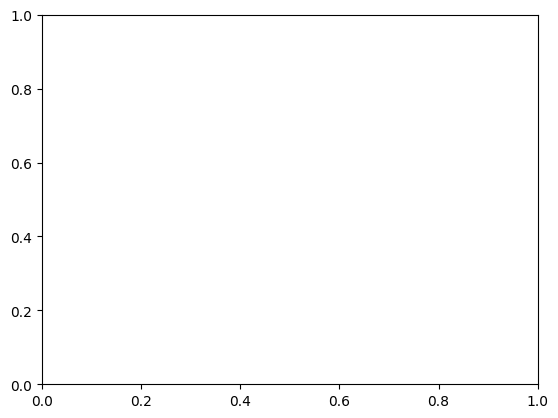

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# draw bar chart for data with 4 groups, 2 subgroups, and 2 items in each subgroup
def draw_bar_chart(data, title, x_label, y_label, x_ticks, y_ticks, x_tick_labels):
    # set width of bar
    bar_width = 0.2

    # set position of bar on X axis
    r1 = np.arange(len(data['CIFAR 10']))
    r2 = [x + bar_width for x in r1]

    # Make the plot
    plt.bar(r1, data['CIFAR 10'].values(), color='#7f6d5f', width=bar_width, edgecolor='white', label='CIFAR 10')
    plt.bar(r2, data['CIFAR 100'].values(), color='#557f2d', width=bar_width, edgecolor='white', label='CIFAR 100')

    # Add xticks on the middle of the group bars
    plt.xlabel(x_label, fontweight='bold')
    plt.ylabel(y_label, fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(data['CIFAR 10']))], x_ticks)

    # Create legend & Show graphic
    plt.legend()
    plt.title(title)
    plt.show()

# draw
draw_bar_chart(data, 'Accuracy of ResNet18 and DenseNet on CIFAR 10 and CIFAR 100', 'Dataset', 'Accuracy', ['ResNet18', 'DenseNet'], [0, 20, 40, 60, 80, 100], ['With Pretrained', 'Scratch'])

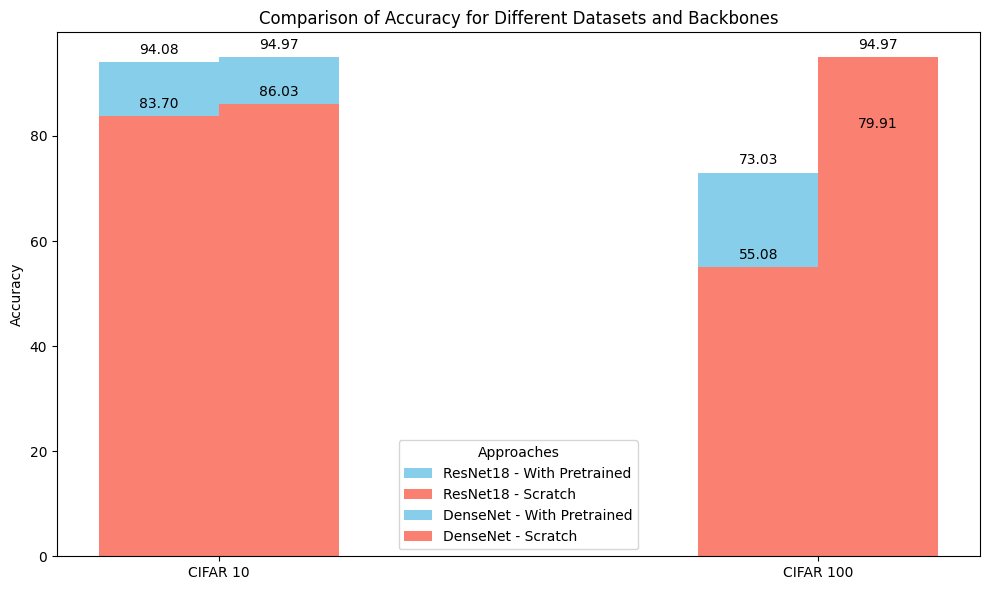

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']
datasets = ['CIFAR 10', 'CIFAR 100']
x = np.arange(len(datasets))  # the label locations
bar_width = 0.2  # the width of the bars
colors = ['skyblue', 'salmon']

# Creating grouped bar charts
fig, ax = plt.subplots(figsize=(10, 6))

for j, backbone in enumerate(backbones):
    for k, approach in enumerate(approaches):
        values = [data[dataset][backbone][approach] for dataset in datasets]
        ax.bar(x + j * bar_width, values, bar_width, label=f'{backbone} - {approach}', color=colors[k])

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy for Different Datasets and Backbones')
ax.set_xticks(x + (bar_width * (len(approaches) - 1)) / 2)
ax.set_xticklabels(datasets)
ax.legend(title='Approaches')

# Adding labels on top of bars
for j, backbone in enumerate(backbones):
    for k, approach in enumerate(approaches):
        for i, dataset in enumerate(datasets):
            value = data[dataset][backbone][approach]
            ax.text(x[i] + j * bar_width, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

In [ ]:
data = {
    'CIFAR 10': {
        'ResNet18 - With Pretrained': {'': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 2 with shape (8,).

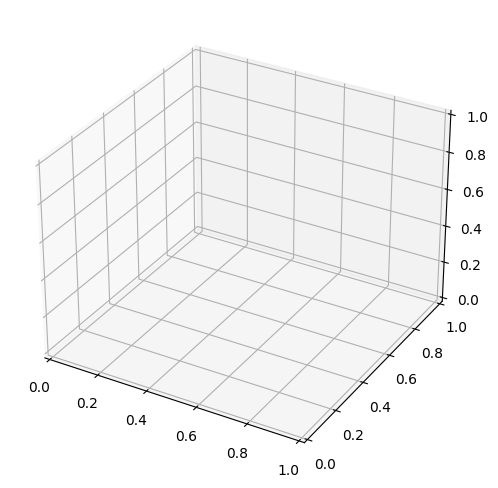

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

# Extracting data for plotting
datasets = ['CIFAR 10', 'CIFAR 100']
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']

# Prepare data for 3D bar plot
x_pos = np.arange(len(datasets))
y_pos = np.arange(len(backbones))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()

z_values = []
for dataset in datasets:
    for backbone in backbones:
        z_row = [data[dataset][backbone][approach] for approach in approaches]
        z_values.append(z_row)
z_values = np.array(z_values)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

dx = dy = 0.5  # Width and depth of bars
dz = z_values.flatten()
ax.bar3d(x_pos, y_pos, np.zeros_like(dz), dx, dy, dz, shade=True)

ax.set_xlabel('Dataset')
ax.set_ylabel('Backbone')
ax.set_zlabel('Accuracy')
ax.set_title('3D Bar Plot of Accuracy for Different Datasets, Backbones, and Approaches')

ax.set_xticks(np.arange(len(datasets)) + dx / 2)
ax.set_xticklabels(datasets)
ax.set_yticks(np.arange(len(backbones)) + dy / 2)
ax.set_yticklabels(backbones)

plt.show()


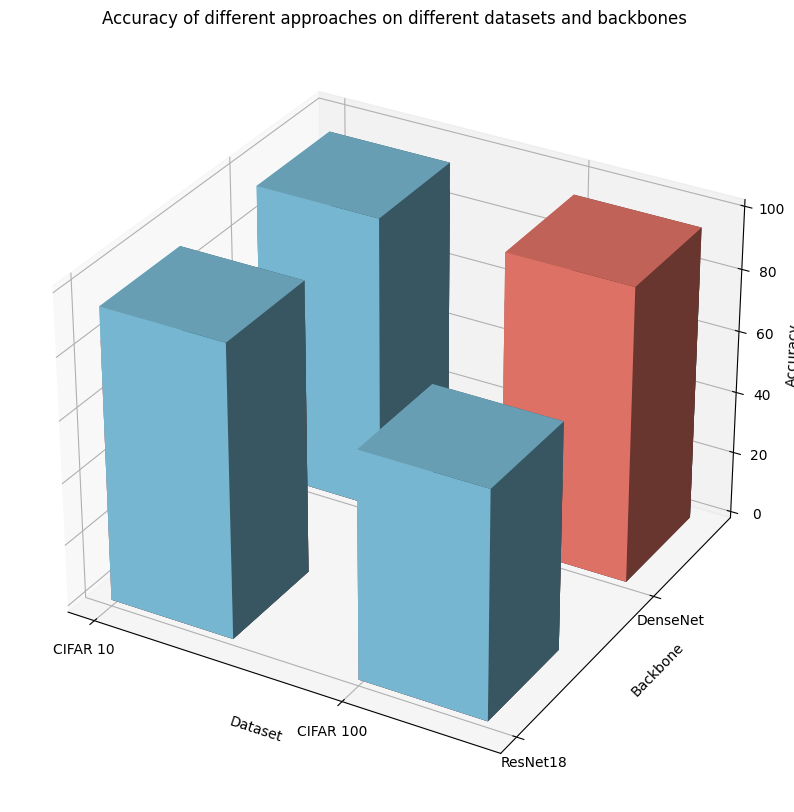

In [8]:
# Data from the provided dataset
data = {
    'CIFAR 10': {
        'ResNet18': {'With Pretrained': 94.08, 'Scratch': 83.7},
        'DenseNet': {'With Pretrained': 94.97, 'Scratch': 86.03}
    },
    'CIFAR 100': {
        'ResNet18': {'With Pretrained': 73.03, 'Scratch': 55.08},
        'DenseNet': {'With Pretrained': 79.91, 'Scratch': 94.97}
    }
}

datasets = ['CIFAR 10', 'CIFAR 100']
backbones = ['ResNet18', 'DenseNet']
approaches = ['With Pretrained', 'Scratch']

# draw 3D bar plot from the data with color defined for approaches
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i, dataset in enumerate(datasets):
    for j, backbone in enumerate(backbones):
        for k, approach in enumerate(approaches):
            ax.bar3d(i, j, 0, 0.5, 0.5, data[dataset][backbone][approach], color=colors[k])

# set labels and ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(datasets)
ax.set_yticklabels(backbones)
ax.set_zticklabels([0, 20, 40, 60, 80, 100])
ax.set_xlabel('Dataset')
ax.set_ylabel('Backbone')
ax.set_zlabel('Accuracy')

# set legend
# ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# set title
plt.title('Accuracy of different approaches on different datasets and backbones')

plt.show()

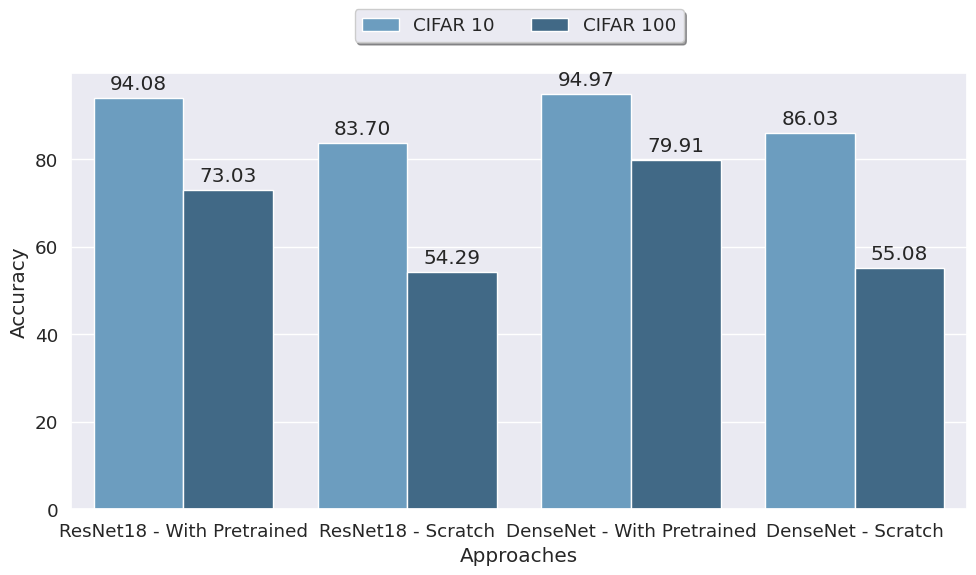

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'CIFAR 10': {
        'ResNet18 - With Pretrained': 94.08,
        'ResNet18 - Scratch': 83.7,
        'DenseNet - With Pretrained': 94.97,
        'DenseNet - Scratch': 86.03
    },
    'CIFAR 100': {
        'ResNet18 - With Pretrained': 73.03,
        'ResNet18 - Scratch': 54.29,
        'DenseNet - With Pretrained': 79.91,
        'DenseNet - Scratch': 55.08
    }
}

# Data from the provided dataset
data_df = pd.DataFrame(data)
data_df.index.name = 'Approaches'
data_df.reset_index(inplace=True)
data_df = data_df.melt(id_vars='Approaches', var_name='Dataset', value_name='Accuracy')

# Creating the bar chart using Seaborn
plt.figure(figsize=(10, 6))
# set text size = 15
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)
# sns.set_palette("coolwarm")
sns.barplot(x='Approaches', y='Accuracy', hue='Dataset', data=data_df, palette="Blues_d")


plt.xlabel('Approaches')
plt.ylabel('Accuracy')
plt.legend(title='Dataset')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
# add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')


plt.tight_layout()

plt.show()


